In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [2]:
imdb_sentences = []
imdb_labels = []


In [3]:
train_data = tfds.as_numpy(tfds.load('imdb_reviews', split='train'))

In [4]:
for items in train_data:
    imdb_sentences.append(str(items['text']))
    imdb_labels.append(str(items['label']))



In [5]:
train_sentence = imdb_sentences[:20000]
test_sentence = imdb_sentences[20000:]

In [6]:
train_labels = imdb_labels[:20000]
test_labels = imdb_labels[20000:]

In [8]:
len(train_sentence)

20000

In [9]:
type(train_sentence)

list

## Tokennisation du corpus

In [48]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [49]:
tokenizer = Tokenizer(oov_token="<OOV>", num_words= 29000)
tokenizer.fit_on_texts(train_sentence)
word_index = tokenizer.word_index # Dictionnaire de mots

In [50]:
training_sequence = tokenizer.texts_to_sequences(train_sentence) # Corpus de texte devient des sequences de nombres

In [51]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
training_padded = pad_sequences(training_sequence, padding = "post", truncating = 'post', maxlen = 100)

In [52]:
train_data.element_spec

{'label': i64[], 'text': str[]}

In [100]:
test_sequence = tokenizer.texts_to_sequences(test_sentence) # Corpus de texte devient des sequences de nombres
test_padded = pad_sequences(test_sequence, padding = "post", truncating = 'post', maxlen = 100)

In [101]:
training_sequence[42]

[4668,
 5,
 2,
 5838,
 1706,
 22,
 2438,
 1117,
 5099,
 594,
 15,
 2,
 423,
 5,
 4,
 836,
 1335,
 3371,
 27082,
 13092,
 2,
 2898,
 5,
 2,
 198,
 6,
 29,
 1568,
 444,
 10,
 21,
 871,
 2,
 217,
 5,
 2,
 530,
 44,
 21,
 4,
 7464,
 1040,
 234,
 477,
 17,
 31,
 1562,
 11738,
 22,
 1913,
 2250,
 807,
 12,
 7,
 229,
 38,
 2,
 526,
 2348,
 13598,
 19,
 1612,
 594,
 1,
 27083,
 4295,
 1576,
 26,
 31,
 727,
 3162,
 239,
 24,
 351,
 2,
 9632,
 5,
 4,
 223,
 3202,
 6,
 70,
 1240,
 8,
 8,
 92,
 5,
 2,
 2071,
 26,
 1,
 244,
 76,
 8969,
 15,
 1706,
 22403,
 646,
 26,
 37,
 13,
 312,
 5,
 2,
 2072,
 582,
 3,
 720,
 8580,
 48,
 23,
 147,
 40,
 169,
 2,
 967,
 160,
 9,
 2,
 89,
 272,
 23,
 305,
 1644,
 17,
 10,
 16,
 92,
 5,
 2,
 20,
 135,
 10423,
 114,
 11739,
 1473,
 1612,
 233,
 516,
 16,
 62,
 52,
 289,
 233,
 516,
 8380,
 13,
 27,
 21,
 2610,
 402,
 3,
 3800,
 5481,
 9,
 2276,
 39,
 2,
 16268,
 1712,
 22404,
 737,
 2,
 218,
 150,
 773,
 53,
 2296,
 76,
 9,
 85,
 101,
 3,
 1834,
 9,
 177,
 609,
 63

In [102]:
len(training_sequence[42])

475

In [103]:
type(test_labels)

numpy.ndarray

In [104]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
from sklearn.preprocessing import LabelEncoder

# En supposant que vos étiquettes se trouvent dans une liste appelée `labels`
encoder = LabelEncoder()
encoder.fit(imdb_labels)

train_labels = encoder.transform(train_labels)
test_labels = encoder.transform(test_labels)

## Embeding et Neurones

In [117]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(29000, 13,input_shape=(100,)))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(8, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(5, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

C:\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [118]:
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10)
best_model = "sentimentdecommentaire.keras"
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath=best_model,
                                               monitor="val_accuracy",
                                               mode = "max",
                                               save_best_only=True)

In [119]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 100, 13)             │         377,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_5           │ (None, 13)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 377,163 (1.44 MB)

 Trainable params: 377,163 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

In [120]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [121]:
history = model.fit(training_padded, train_labels, epochs= 50, validation_data= (test_padded, test_labels), callbacks=[ stop, model_ckp])

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5336 - loss: 0.6917 - val_accuracy: 0.6856 - val_loss: 0.6585
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6529 - loss: 0.6405 - val_accuracy: 0.7914 - val_loss: 0.5423
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8247 - loss: 0.4747 - val_accuracy: 0.8196 - val_loss: 0.5088
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8655 - loss: 0.3827 - val_accuracy: 0.8286 - val_loss: 0.5480
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8849 - loss: 0.3310 - val_accuracy: 0.8330 - val_loss: 0.5970
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9056 - loss: 0.2822 - val_accuracy: 0.8314 - val_loss: 0.6342
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9177 - loss: 0.2481 - val_accuracy: 0.8338 - val_loss: 0.6727
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9222 - loss: 0.2298 - val_accuracy: 0

In [122]:
type(test_labels)

numpy.ndarray

In [123]:
type(test_padded)

numpy.ndarray

In [124]:
print(training_padded.dtype)
print(train_labels.dtype)
print(test_padded.dtype)
print(test_labels.dtype)

int32
int32
int32
int32


In [125]:
training_padded.dtype

dtype('int32')

In [126]:
train_labels.dtype

dtype('int32')

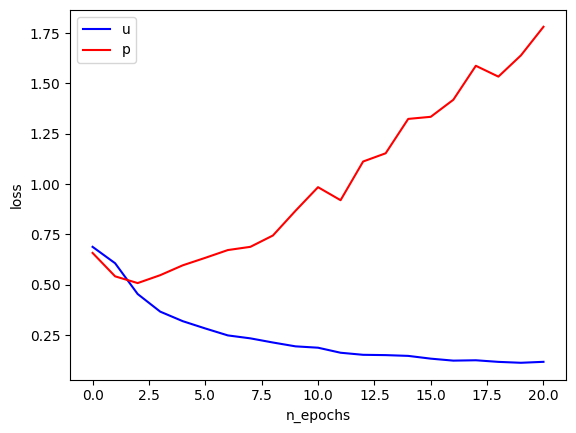

In [127]:
plt.plot(np.arange(0,len(history.history["val_accuracy"])), history.history["loss"], c="b")
plt.plot(np.arange(0,len(history.history["val_accuracy"])), history.history["val_loss"], c="r")
plt.xlabel("n_epochs")
plt.ylabel("loss")
plt.legend("upper right")
plt.show()

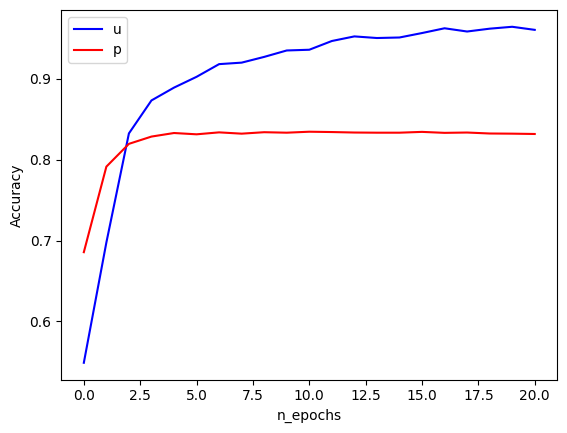

In [128]:
plt.plot(np.arange(0,len(history.history["val_accuracy"])), history.history["accuracy"], c="b")
plt.plot(np.arange(0,len(history.history["val_accuracy"])), history.history["val_accuracy"], c="r")
plt.xlabel("n_epochs")
plt.ylabel("Accuracy")
plt.legend("upper right")
plt.show()

In [129]:
np.sqrt(np.sqrt(29000))

13.049669101523763

# Transfert Learning


In [ ]:
!pip install --upgrade tensorflow_hub

In [132]:
import tensorflow_hub as hb

In [134]:
import tensorflow_hub as hub

rembed = hub. load("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1")
embeddings = rembed(["cat is on the mat", "dog is in the fog"])

In [135]:
embeddings.shape

TensorShape([2, 20])